In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-59.34115523890118 100.27663515307569
8.78832904483184 -92.05892967231934
72.02761287334457 -147.63268288426983
-45.74158186968597 -28.649419715672735
27.55310481865463 -135.79891774641777
-10.927626704897179 -128.74646181227098
30.206173740096816 -176.704368735294
-28.474012631571476 155.1091330269926
-42.828055806182356 -14.956087238214224
-54.90075405811228 -72.07424613376357
-24.496147951277536 159.45062213396363
-47.07745058917441 130.31651914492318
59.36557640665487 -103.73109660398771
-82.70846098864125 -112.91649188979659
66.91702816527521 94.64559846772096
-74.28601570718973 5.230912245892114
-80.98078223760122 89.56221122103
51.1717870149578 -126.12248317369321
-87.55348733517113 -10.322734764171429
61.10077266827588 149.00805447341565
-79.2656583164579 145.3347951989374
-84.58252290128617 176.87655638537035
10.39241597180036 69.70015156732944
18.012848211760783 22.393536312744033
14.120573573229308 -76.92713083945675
-61.0473177330998 -47.12201781164475
-60.754880834829464 -

-33.66832410749593 76.12283279587217
-43.06832546737019 -81.56523843928929
23.08277123456031 125.28851253452245
-40.92550195630001 20.090268782804742
-41.66032923012212 -135.53060635848595
14.025934354781185 -137.13658854928218
7.2065132541442125 -145.11711383268698
-65.82451967955379 92.2226236249287
77.70260065772163 -43.79302078318477
-56.431490440381594 21.513691785500185
-77.69411880179 -61.43835194881666
46.285333751306865 104.65233521024635
-84.30322932105635 -11.659982038395896
60.18531358230922 116.25050334673625
-55.388215267409485 137.61418510322443
21.19677665336252 -166.18573056068925
49.234493768360124 139.59866917259035
60.55286545309107 39.5612925856108
61.77707495352047 69.6481837260377
21.0914342153214 -15.058715969071727
-58.38138514482381 82.17474893062263
-35.32325088968712 146.7390794703034
-55.44255113991467 -25.702036960523486
-3.6276232918612408 -8.32987097168754
26.58376320570065 43.034206978272465
-29.51604695313214 -136.35535470481022
-6.0946172794190545 84.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | san jose
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | pacific grove
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | byron bay
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | koumac
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | la ronge
Processing Record 14 of Set 1 | baykit
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | campbell river
Processing Record 17 of Set 1 | ust-omchug
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | kavaratti
Processing Record 21 of Set 1 | faya
Processing Record 22 of Set 1 | puerto colombia
Processing Record 23 of Set

Processing Record 38 of Set 4 | alta floresta
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | crab hill
City not found. Skipping...
Processing Record 41 of Set 4 | damaturu
Processing Record 42 of Set 4 | kununurra
Processing Record 43 of Set 4 | fort-shevchenko
Processing Record 44 of Set 4 | maun
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | columbus
Processing Record 47 of Set 4 | cayenne
Processing Record 48 of Set 4 | szarvas
Processing Record 49 of Set 4 | alice springs
Processing Record 50 of Set 4 | coihueco
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | the valley
Processing Record 3 of Set 5 | lakes entrance
Processing Record 4 of Set 5 | ixtapa
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | raga
Processing Record 7 of Set 5 | washougal
Processing Record 8 of Set 5 | nelson bay
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 5 | ni

Processing Record 25 of Set 8 | kahului
Processing Record 26 of Set 8 | calabozo
Processing Record 27 of Set 8 | lulea
Processing Record 28 of Set 8 | ola
Processing Record 29 of Set 8 | timizart
Processing Record 30 of Set 8 | vila franca do campo
Processing Record 31 of Set 8 | ulkan
Processing Record 32 of Set 8 | rumoi
Processing Record 33 of Set 8 | kandrian
Processing Record 34 of Set 8 | shimoni
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | cabatuan
Processing Record 37 of Set 8 | camocim
Processing Record 38 of Set 8 | mont-dore
Processing Record 39 of Set 8 | brae
Processing Record 40 of Set 8 | jambi
Processing Record 41 of Set 8 | nhulunbuy
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | envira
Processing Record 44 of Set 8 | stony plain
Processing Record 45 of Set 8 | susangerd
Processing Record 46 of Set 8 | riverton
Processing Record 47 of Set 8 | inta
Processing Record 48 of Set 8 | tallahassee
Processing Record 49 of Set

Processing Record 15 of Set 12 | sangar
Processing Record 16 of Set 12 | oranjestad
Processing Record 17 of Set 12 | mitzic
Processing Record 18 of Set 12 | kasamwa
Processing Record 19 of Set 12 | neuquen
Processing Record 20 of Set 12 | xingyi
Processing Record 21 of Set 12 | turmalina
Processing Record 22 of Set 12 | istanbul
Processing Record 23 of Set 12 | bridlington
Processing Record 24 of Set 12 | yebaishou
Processing Record 25 of Set 12 | san cristobal
Processing Record 26 of Set 12 | san andres
Processing Record 27 of Set 12 | kasongo-lunda
Processing Record 28 of Set 12 | anito
Processing Record 29 of Set 12 | pontes e lacerda
Processing Record 30 of Set 12 | ler
Processing Record 31 of Set 12 | guayaramerin
Processing Record 32 of Set 12 | kaputa
Processing Record 33 of Set 12 | puerto leguizamo
Processing Record 34 of Set 12 | guaruja
Processing Record 35 of Set 12 | flinders
Processing Record 36 of Set 12 | erenhot
Processing Record 37 of Set 12 | pangai
Processing Record

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,59.49,75,100,27.98,AU,2022-06-12 18:33:34
1,San Jose,37.3394,-121.8950,86.49,56,75,8.05,US,2022-06-12 18:31:31
2,College,64.8569,-147.8028,53.92,66,100,0.00,US,2022-06-12 18:33:34
3,Arraial Do Cabo,-22.9661,-42.0278,69.76,68,75,12.66,BR,2022-06-12 18:33:35
4,Pacific Grove,36.6177,-121.9166,75.24,81,0,8.99,US,2022-06-12 18:33:35
5,Atuona,-9.8000,-139.0333,78.22,63,100,16.89,PF,2022-06-12 18:33:35
6,Kapaa,22.0752,-159.3190,80.58,81,75,14.97,US,2022-06-12 18:33:36
7,Byron Bay,-28.6500,153.6167,48.70,66,100,7.78,AU,2022-06-12 18:30:50
8,Jamestown,42.0970,-79.2353,72.52,66,100,5.01,US,2022-06-12 18:33:04
9,Punta Arenas,-53.1500,-70.9167,53.71,71,20,4.61,CL,2022-06-12 18:33:34


In [12]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-06-12 18:33:34,-33.6500,115.3333,59.49,75,100,27.98
1,San Jose,US,2022-06-12 18:31:31,37.3394,-121.8950,86.49,56,75,8.05
2,College,US,2022-06-12 18:33:34,64.8569,-147.8028,53.92,66,100,0.00
3,Arraial Do Cabo,BR,2022-06-12 18:33:35,-22.9661,-42.0278,69.76,68,75,12.66
4,Pacific Grove,US,2022-06-12 18:33:35,36.6177,-121.9166,75.24,81,0,8.99
...,...,...,...,...,...,...,...,...,...
566,Xiamen,CN,2022-06-12 18:48:32,24.4798,118.0819,76.24,94,100,2.24
567,Maraba,BR,2022-06-12 18:44:26,-5.3686,-49.1178,78.98,100,40,2.30
568,Asadabad,IR,2022-06-12 18:48:32,34.7824,48.1185,75.15,24,1,2.57
569,Chiman,PK,2022-06-12 18:48:33,32.5463,73.8138,94.42,24,100,2.64


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

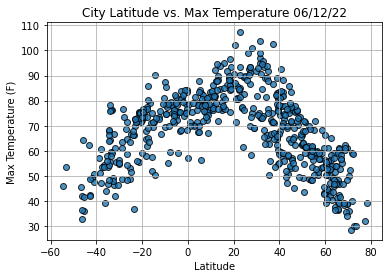

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

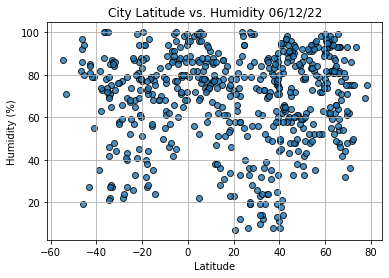

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

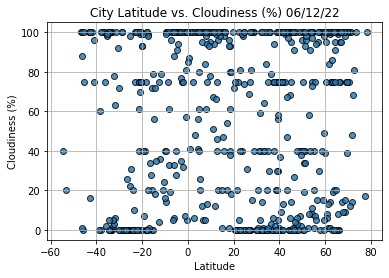

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

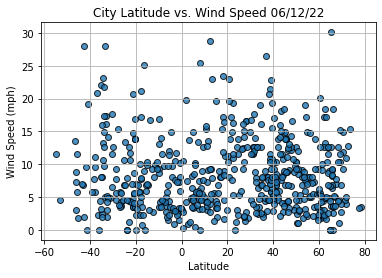

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()